In [1]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#check tensorflow version
print(tf.__version__)

2.0.0


In [2]:
#load data
fashion_mnist = keras.datasets.fashion_mnist

#format data...
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


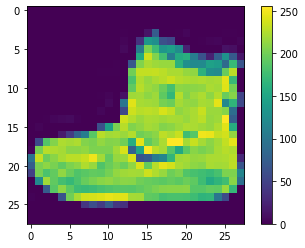

In [3]:
#quick img check
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
#resize and make to float
train_images = train_images / 255.0

test_images = test_images / 255.0



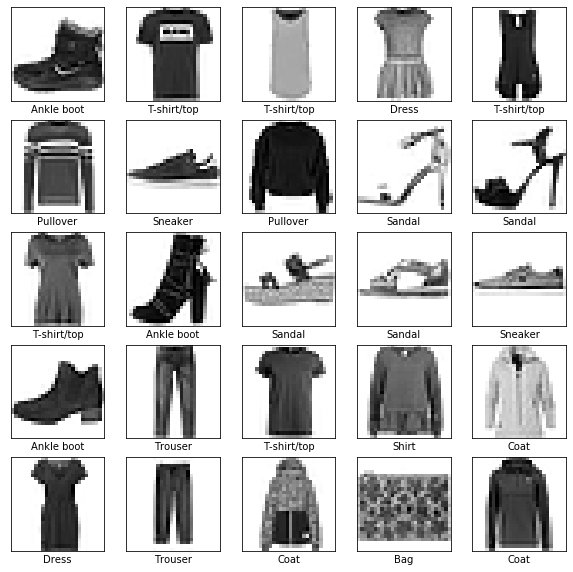

In [5]:
#plot check items
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [9]:
#build neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

#compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#fit model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.4947 - accuracy: 0.8272
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3739 - accuracy: 0.8655
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3344 - accuracy: 0.8786
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3125 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2927 - accuracy: 0.8929
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2794 - accuracy: 0.8970
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2662 - accuracy: 0.9030
Epoch 8/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2556 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2459 - accuracy: 0.9086
Epoch 10/10


In [10]:
#test model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


10000/1 - 1s - loss: 0.2194 - accuracy: 0.8739

Test accuracy: 0.8739


In [21]:
#make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [22]:
#looking at a prediction
predictions[0]

#check prediction
np.argmax(predictions[0])

9

In [23]:

#define plot function
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

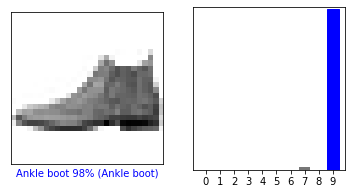

In [24]:

#verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

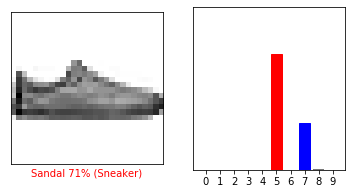

In [25]:
#verify predictions
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

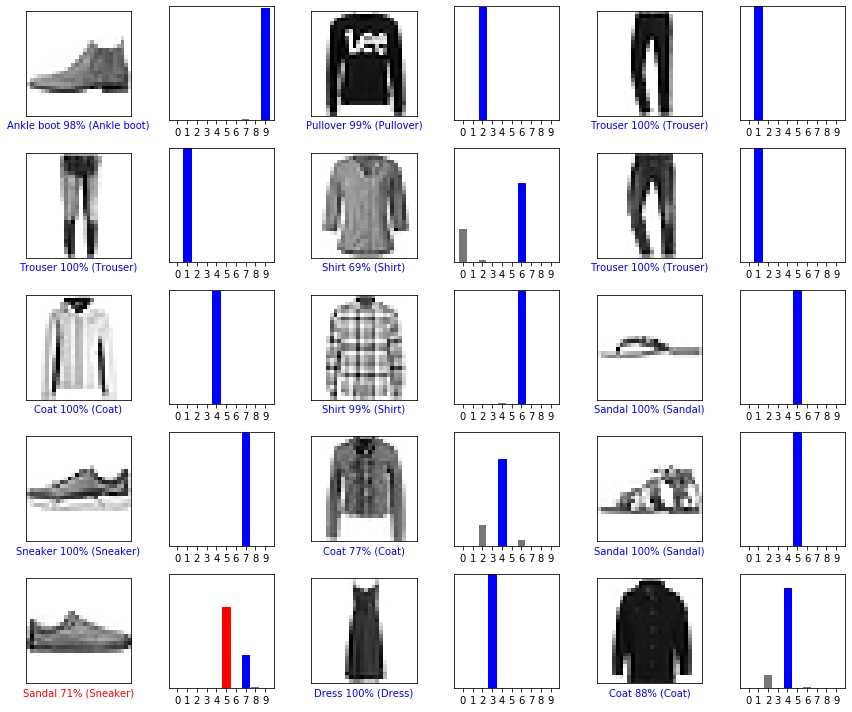

In [26]:
#plot some of the predictions in grid
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [30]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))


In [32]:
#make predictions on single image
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.68315955e-06 1.01573914e-13 9.91644800e-01 4.46784184e-13
  2.07129167e-03 5.66832432e-12 6.28016144e-03 6.19681632e-19
  2.68362416e-10 3.29507146e-13]]


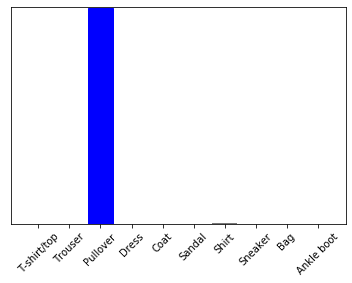

In [33]:
#plot
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
#what is its guess
np.argmax(predictions_single[0])


2